# Problem 3 Sample Code

This sample code is meant as a guide on how to use PyTorch and how to use the relevant model layers. This not a guide on how to design a network and the network in this example is intentionally designed to have poor performace.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms

## Loading MNIST
The `torchvision` module contains links to many standard datasets. We can load the MNIST dataset into a `Dataset` object as follows:

In [ ]:
train_dataset = datasets.MNIST('./data', train=True, download=True,  # Downloads into a directory ../data
                               transform=transforms.ToTensor())
test_dataset = datasets.MNIST('./data', train=False, download=False,  # No need to download again
                              transform=transforms.ToTensor())

 The `Dataset` object is an iterable where each element is a tuple of (input `Tensor`, target):

In [ ]:
print(len(train_dataset), type(train_dataset[0][0]), type(train_dataset[0][1]))

# tensor, target = train_dataset[0]
# print("num train images: "+str(len(train_dataset)))
# print("num test images: "+str(len(test_dataset)))
# print("height: "+str(len(tensor[0])))
# print("width: "+str(len(tensor[0][0])))
# print(tensor)

60000 <class 'torch.Tensor'> <class 'int'>


We can convert images to numpy arrays and plot them with matplotlib:

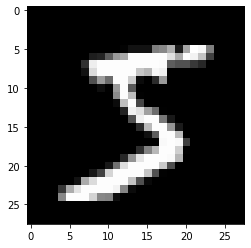

In [ ]:
plt.imshow(train_dataset[0][0][0].numpy(), cmap='gray')

## Network Definition
Let's instantiate a model and take a look at the layers.

In [ ]:
model = nn.Sequential(
    # In problem 2, we don't use the 2D structure of an image at all. Our network
    # takes in a flat vector of the pixel values as input.

    # 97.73
    # nn.Flatten(),
    # nn.Linear(784, 150),
    # nn.ReLU(),
    # nn.Linear(150, 30),
    # nn.ReLU(),
    # nn.Linear(30, 20),
    # nn.ReLU(),
    # nn.Linear(20, 10),
    # nn.Dropout(0.1),
    # nn.Softmax(dim=1)

    nn.Flatten(),
    nn.Linear(784, 400),
    nn.ReLU(),
    nn.Linear(400, 300),
    nn.ReLU(),
    nn.Linear(300, 280),
    nn.ReLU(),
    nn.Linear(280, 20),
    nn.ReLU(),
    nn.Linear(20, 10),
    nn.Dropout(0.07),
    nn.Softmax(dim=1)
)
print(model)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=400, bias=True)
  (2): ReLU()
  (3): Linear(in_features=400, out_features=300, bias=True)
  (4): ReLU()
  (5): Linear(in_features=300, out_features=280, bias=True)
  (6): ReLU()
  (7): Linear(in_features=280, out_features=20, bias=True)
  (8): ReLU()
  (9): Linear(in_features=20, out_features=10, bias=True)
  (10): Dropout(p=0.07, inplace=False)
  (11): Softmax(dim=1)
)


## Training
We also choose an optimizer and a loss function.

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
loss_fn = nn.CrossEntropyLoss()

We could write our training procedure manually and directly index the `Dataset` objects, but the `DataLoader` object conveniently creates an iterable for automatically creating random minibatches:

In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=80, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=80, shuffle=True) 

print(torch.seed())
#torch.manual_seed(15552494823729223621)
#15552494823729223621 97.9
#6202543811676496745 98.01

#4012035888747445639 98.17

2141766464899450509


We now write our backpropagation loop, training for 10 epochs.

In [ ]:
# Some layers, such as Dropout, behave differently during training
model.train()

for epoch in range(20):
    for batch_idx, (data, target) in enumerate(train_loader):
        # Erase accumulated gradients
        optimizer.zero_grad()

        # Forward pass
        output = model(data)

        # Calculate loss
        loss = loss_fn(output, target)

        # Backward pass
        loss.backward()
        
        # Weight update
        optimizer.step()

    # Track loss each epoch
    print('Train Epoch: %d  Loss: %.4f' % (epoch + 1,  loss.item()))

Train Epoch: 1  Loss: 1.6938
Train Epoch: 2  Loss: 1.6158
Train Epoch: 3  Loss: 1.6253
Train Epoch: 4  Loss: 1.6082
Train Epoch: 5  Loss: 1.6175
Train Epoch: 6  Loss: 1.5629
Train Epoch: 7  Loss: 1.5517
Train Epoch: 8  Loss: 1.5373
Train Epoch: 9  Loss: 1.6572
Train Epoch: 10  Loss: 1.5556
Train Epoch: 11  Loss: 1.5591
Train Epoch: 12  Loss: 1.5440
Train Epoch: 13  Loss: 1.5423
Train Epoch: 14  Loss: 1.5126
Train Epoch: 15  Loss: 1.4914
Train Epoch: 16  Loss: 1.5057
Train Epoch: 17  Loss: 1.5051
Train Epoch: 18  Loss: 1.5429
Train Epoch: 19  Loss: 1.5088
Train Epoch: 20  Loss: 1.5306


## Testing
We can perform forward passes through the network without saving gradients.

In [ ]:
# Putting layers like Dropout into evaluation mode
model.eval()

test_loss = 0
correct = 0

# Turning off automatic differentiation
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        test_loss += loss_fn(output, target).item()  # Sum up batch loss
        pred = output.argmax(dim=1, keepdim=True)  # Get the index of the max class score
        correct += pred.eq(target.view_as(pred)).sum().item()

test_loss /= len(test_loader.dataset)

print('Test set: Average loss: %.4f, Accuracy: %d/%d (%.4f)' %
      (test_loss, correct, len(test_loader.dataset),
       100. * correct / len(test_loader.dataset)))

Test set: Average loss: 0.0186, Accuracy: 9715/10000 (97.1500)
